In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Lane Lines

Features of Lane Lines:
* Are usually straight
* Are on a road
* Have contrast with the road
* Usually converge on the horizon (when on a straight road)
* Yellow and white (black sometimes)
* Closer to the car's center towards either end
* Vertical

Method Pixel Probability:
* Give each pixel a probability of being a pixel of a lane line
* Then traverse through the image and connect the pixels
* Observe the lines formed
* Pick the most reasonable line as a lane line

# Pixel Prob

In [3]:
cap = cv2.VideoCapture('Motorway/Sialkot.mp4')

In [7]:
def perc_resize(img,perc):
    scale_percent = perc # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [8]:
yellow = np.array([0,255,255])

In [15]:
def color_closeness(img, color):
    null = np.resize(color,(img.shape[0],img.shape[1],3))
    return np.divide(np.sum(np.abs(null - img),2),3).astype('uint8')

In [ ]:
cap = cv2.VideoCapture('Motorway/Sialkot.mp4')
scale_percent = 20
original = "original_color.jpg"
new = "new_color.jpg"

while(cap.isOpened()):
    ret, frame = cap.read()
    down_sized = perc_resize(frame,scale_percent)
    cc = color_closeness(down_sized,yellow)    
    cv2.imshow('cc',cc)
    cv2.imshow('frame',down_sized)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite(original,down_sized)
        cv2.imwrite(new, cc)
        break
        
        
cap.release()

cv2.destroyAllWindows()


# Exploration

In [2]:
cap = cv2.VideoCapture('Motorway/Sialkot.mp4')


In [4]:
def Contrast(img):
    return cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    

In [22]:
def getPeaks(img,ran):
    peaks = []
    peaked = img.copy()
    null = np.zeros((img.shape[0],img.shape[1]),dtype='uint8')
    for i in ran:
        peaks.append(find_peaks(img[i],prominence=10,threshold=1)[0])
        n_peaks = len(peaks[-1]) - 1
        color = [255]
        for ps in peaks[-1]:
            cv2.circle(null, (ps,i), radius=1, color=color, thickness=-1)
    return null

- Lines of close points
- Average zero interference

In [217]:
cap = cv2.VideoCapture('Motorway/Sialkot.mp4')
original = "original.jpg"
new = "new.jpg"

scale_percent = 20
while(cap.isOpened()):
    ret, frame = cap.read()
    down_sized = perc_resize(frame,scale_percent)
    gray = cv2.cvtColor(down_sized, cv2.COLOR_BGR2GRAY)
    peaked = getPeaks(gray,range(0,gray.shape[0]))
    #canny = cv2.Canny(gray,50,200)
    #blurred = cv2.blur(peaked,(3,3))
    #sobelx = cv2.Sobel(gray,cv2.CV_32F,1,0,ksize=1)
    #hls = cv2.cvtColor(down_sized, cv2.COLOR_RGB2HLS)
    #_,contrast = Contrast(gray)
    
    #cv2.imshow('frame',down_sized)
    cv2.imshow('frame1',peaked)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite(original,down_sized)
        cv2.imwrite(new, peaked)
        break
        
        
cap.release()

cv2.destroyAllWindows()



In [9]:
cap.release()
cv2.destroyAllWindows()

# Finding Peaks

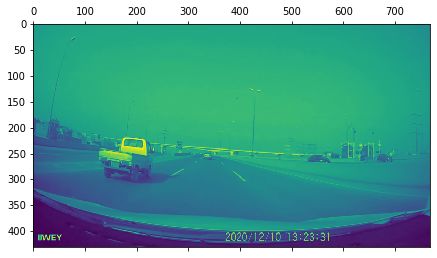

In [9]:
plt.matshow(gray)

In [223]:
gray.shape

(432, 768)

In [233]:
line = 350

In [128]:
ran = range(390,400)

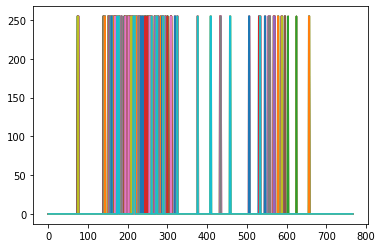

In [130]:
for i in ran:
    plt.plot(peaked[i])
plt.show()

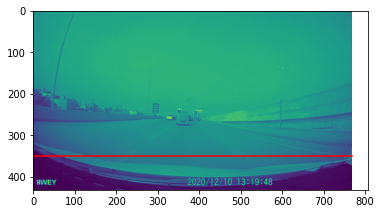

In [235]:
plt.imshow(gray)
plt.plot((0,768),(line,line),'r-')

In [230]:
768//2

384

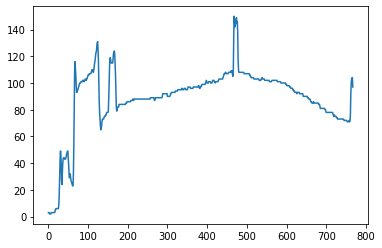

In [248]:
 plt.plot(gray[350])


In [337]:
line = 100

In [84]:
plt.plot(gray[line])
idx = find_peaks(gray[line],prominence=10,threshold=1)[0]
plt.plot(idx,gray[line][idx],'ro')

NameError: name 'line' is not defined

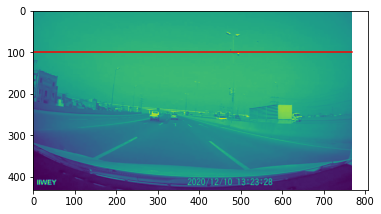

In [339]:
plt.imshow(gray)
plt.plot((0,768),(line,line),'r-')

In [103]:
def getPeaks_testing(img,ran):
    peaks = []
    peaked = img.copy()
    null = np.zeros((img.shape[0],img.shape[1],3))
    for i in ran:
        peaks.append(find_peaks(img[i],prominence=10,threshold=1)[0])
        n_peaks = len(peaks[-1]) - 1
        idx = n_peaks//2
        if n_peaks < 3:
            for ps in peaks[-1]:
                cv2.circle(null, (ps,i), radius=5, color=(255, 255, 255), thickness=-1)
            if n_peaks > 0:
                cv2.circle(null, (peaks[-1][idx],i), radius=5, color=[0, 0, 255], thickness=-1)
                cv2.circle(null, (peaks[-1][idx+1],i), radius=5, color=[0, 0, 255], thickness=-1)
            #plt.plot(peaks[-1],img[i][peaks[-1]],'ro')
            #plt.plot(img[i])
            #plt.show()
    return null

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


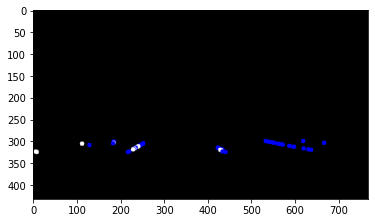

In [104]:
plt.imshow(getPeaks_testing(gray,range(250,400)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


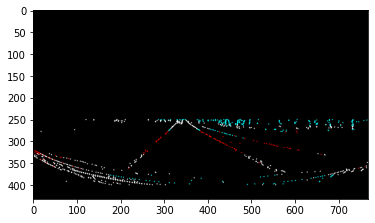

In [136]:
plt.imshow(peaked)

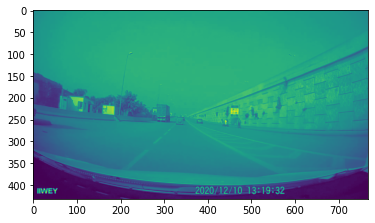

In [137]:
plt.imshow(gray)

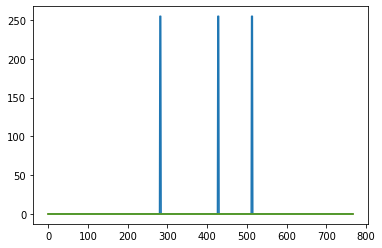

In [148]:
plt.plot(peaked[300])

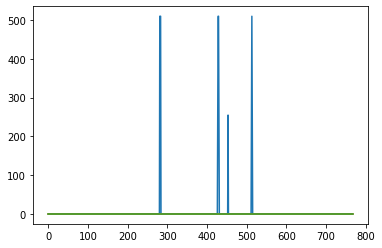

In [153]:
plt.plot(peaked[301]+peaked[300])

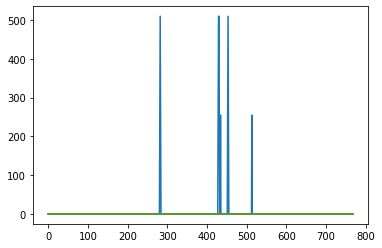

In [154]:
plt.plot(peaked[302]+peaked[301])

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [10]:
for y in range(270,330):
    for x in range(len(peaked[y])):
        if peaked[y][x][0]:
            plt.imshow(peaked[y-5:y+5,x-5:x+5])
            #plt.show()
            print(y,x)

IndexError: index 270 is out of bounds for axis 0 with size 216

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


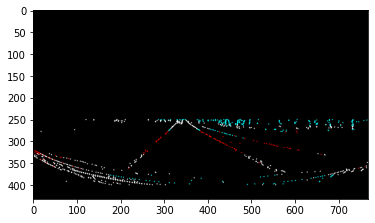

# Masking

In [26]:
cap = cv2.VideoCapture('Motorway/Sialkot.mp4')
original = "original.jpg"
new = "new.jpg"

scale_percent = 20
while(cap.isOpened()):
    ret, frame = cap.read()
    down_sized = perc_resize(frame,scale_percent)
    gray = cv2.cvtColor(down_sized, cv2.COLOR_BGR2GRAY)
    peaked = getPeaks(gray,range(0,gray.shape[0]))
    masked = cv2.bitwise_and(down_sized,down_sized,mask=peaked)
    #canny = cv2.Canny(gray,50,200)
    #blurred = cv2.blur(peaked,(3,3))
    #sobelx = cv2.Sobel(gray,cv2.CV_32F,1,0,ksize=1)
    #hls = cv2.cvtColor(down_sized, cv2.COLOR_RGB2HLS)
    #_,contrast = Contrast(gray)
    
    cv2.imshow('frame',down_sized)
    cv2.imshow('frame1',masked)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite(original,down_sized)
        cv2.imwrite(new, peaked)
        break
        
        
cap.release()

cv2.destroyAllWindows()
